Pare esse exercício serão disponibilizados três arquivos: ***amazonas.csv*** que contém dados históricos de desflorestamento nos municipios do Amazonas no ano de 2014, ***estados.csv*** que contém uma lista com o nome, uf e codigo dos estados brasileiros e ***municipios.csv*** que contém o nome de todos os municípios brasileiros e suas respectivas localizações no globo (longitude e latitude).

O objetivo do exercício é gerar um relatório sobre o desflorestamento nos municípios do Amazonas com a visualização dos dados sobre o mapa do Brasil.
Para isso será necessário relacionar ambas as três tabelas de forma que seja associado a posição geográfica (longitude e latitude) dos municípios aos dados de desflorestamento.


In [80]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
#biblioteca para plotar no mapa
import mplleaflet

In [81]:
#começaremos importando todas as tabelas
amazonas=pd.read_csv(r"C:\Users\GSaMenezes\amazonas.csv")
estados=pd.read_csv(r"C:\Users\GSaMenezes\estados.csv")
municipios=pd.read_csv(r"C:\Users\GSaMenezes\municipios.csv")

Apos carregar os dados devemos associar as tabelas de estados e municípios e selecionar apenas os municípios do Amazonas

In [82]:
estados.head()

,codigo_uf,uf,nome
0,11,RO,Rondônia
1,12,AC,Acre
2,13,AM,Amazonas
3,14,RR,Roraima
4,15,PA,Pará


In [83]:
#Amazonas possui código 13
municipios=municipios[municipios['codigo_uf']==13]

In [84]:
municipios.head()

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
170,1300029,Alvarães,-3.22727,-64.8007,0,13
195,1300060,Amaturá,-3.37455,-68.2005,0,13
216,1300086,Anamã,-3.56697,-61.3963,0,13
252,1300102,Anori,-3.74603,-61.6575,0,13
286,1300144,Apuí,-7.19409,-59.8960,0,13


Note que nos dados provenientes da tabela ***municipios.csv*** o nome dos municípios estão todos acentuados, no entanto na tabela amazonas os nomes estão sem acento. Logo é necessario remover os acentos dos nomes da tabela ***municipios.csv***.

Em seguida relacione as tabelas municipios e amazonas.

### Questão


Plote no mapa do Brasil indicadores  de desflorestamento para todos os municipios do amazonas.
Os indicadores devem ser relativos ao tamanho da floresta de cada município dando destaque aos municipios que com desflorestamento acima da média.

#### Dica

O desflorestamento relativo é dado pelas colunas ***Desflorestamento 2014*** / ***Floresta*** da tabela ***amazonas.csv***.
Note que a coluna ***Floresta*** não é numérica e contém ',' separando os milhares, sendo necessário remover a ',' de todas as entradas e logo após converter os valores para float.

Podem ser usadas todas as dicas relevantes sobre apresentação de figuras  nos textos *Making Data Meaningful* e *Ten Simple Rules for Better Figures*.

Para plotar sobre o mapa, pode-se usar a funções normais do matplotlib e ao fim chamar a função **mplleaflet.display()**.

In [85]:
municipios.loc[:,'nome']=municipios.loc[:,'nome'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [86]:
municipios.head()

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
170,1300029,Alvaraes,-3.22727,-64.8007,0,13
195,1300060,Amatura,-3.37455,-68.2005,0,13
216,1300086,Anama,-3.56697,-61.3963,0,13
252,1300102,Anori,-3.74603,-61.6575,0,13
286,1300144,Apui,-7.19409,-59.8960,0,13


In [87]:
amazonas['Floresta'] = amazonas['Floresta'].apply(lambda x: float(x.replace(',', '')))

In [88]:
amazonas['Desflorestamento relativo'] = amazonas['Desflorestamento 2014']/amazonas['Floresta']


In [89]:
df = pd.merge(left=amazonas,right=municipios,left_on='Municípios', right_on='nome')

In [90]:
#Para não ter colunas com informações repetidas
df = df.drop('Municípios',axis=1)

In [91]:
df.head()

,Agricultura Anual,Área não Observada,Área Urbana,Desflorestamento 2014,Floresta,Hidrografia,Mineração,Mosaico de Ocupações,Não Floresta,Outros,...,Regeneração com Pasto,Vegetação Secundária,Total Geral,Desflorestamento relativo,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,NaN,0.07,1.90,2.75,5415.56,133.87,NaN,101.08,43.26,5.36,...,5.13,198.55,"5,911.46",0.000508,1300029,Alvaraes,-3.22727,-64.8007,0,13
1,NaN,NaN,2.05,0.36,4220.22,209.41,NaN,15.87,216.55,3.76,...,11.44,71.74,"4,755.42",0.000085,1300060,Amatura,-3.37455,-68.2005,0,13
2,NaN,0.86,0.89,0.44,2001.85,229.30,NaN,6.90,34.81,13.11,...,NaN,160.61,"2,451.66",0.000220,1300086,Anama,-3.56697,-61.3963,0,13
3,NaN,0.15,2.77,0.59,4646.53,436.07,NaN,17.12,636.01,4.70,...,NaN,41.98,"5,794.49",0.000127,1300102,Anori,-3.74603,-61.6575,0,13
4,NaN,6.71,5.91,80.19,51396.43,213.50,NaN,8.76,622.87,7.18,...,208.13,546.18,"54,238.32",0.001560,1300144,Apui,-7.19409,-59.8960,0,13


In [92]:
#Gráfico do desflorestamento relativo
plt.figure(figsize=(8,8))
plt.scatter(x=df['longitude'], y=df['latitude'], s=6*10**4*df['Desflorestamento relativo'], c= 'r')
mplleaflet.display()

C:\Users\GSaMenezes\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


### Questão


Segundo os dados, a mineração nos municípios tem alguma relação com o desflorestamento acima da média?
Mostre suas conclusões por tabelas e plots no mapa.

In [93]:
#Assumi-se que NaN é igual a 0 para atividade de mineração
df['Mineração'].fillna(0, inplace=True)

In [95]:
#Criando uma coluna para categorizar onde há ou não mineração
df['Existe Mineração'] = np.where(df['Mineração']>0, 'Há Mineração', 'Não há Mineração')

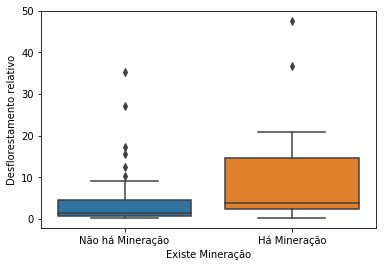

In [98]:
#Boxplot para comparar as duas categorias
plt.figure()
box_plot=sns.boxplot(x=df['Existe Mineração'], y = 10**4*df['Desflorestamento relativo'])
plt.show()

# Dessa forma, cidades com atividade de mineração possuem maior desflorestamento relativo

In [101]:
plt.figure(figsize=(8,8))
plt.scatter(x=df['longitude'], y=df['latitude'], s=50*df['Mineração'], c= 'b')
plt.scatter(x=df['longitude'], y=df['latitude'], s=6*10**4*df['Desflorestamento relativo'], c='r')
mplleaflet.display()

C:\Users\GSaMenezes\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")
